In [17]:
from os import chdir
chdir("C:/Users/idris/Desktop/ENSAE/S1_3A/Statistique_Bayesienne/BayesianStats/")
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from src.model.mbc_model import MBClustering
import statsmodels.api as sm

In [18]:
sns.set_theme()

In [19]:
data_quint = pd.read_csv(f"./data/data_quint.csv", sep=",").reset_index()

In [20]:
data_quint.columns = ["country", "sr", "pop15", "pop75", "dpi", "ddpi"]

In [21]:
data_quint

,country,sr,pop15,pop75,dpi,ddpi
0,Australia,11.43,29.35,2.87,2329.68,2.87
1,Austria,12.07,23.32,4.41,1507.99,3.93
2,Belgium,13.17,23.80,4.43,2108.47,3.82
3,Bolivia,5.75,41.89,1.67,189.13,0.22
4,Brazil,12.88,42.19,0.83,728.47,4.56
5,Canada,8.79,31.72,2.85,2982.88,2.43
6,Chile,0.60,39.74,1.34,662.86,2.67
7,China,11.90,44.75,0.67,289.52,6.51
8,Colombia,4.98,46.64,1.06,276.65,3.08
9,Costa Rica,10.78,47.64,1.14,471.24,2.80


# Linear Regression

c:\Users\idris\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


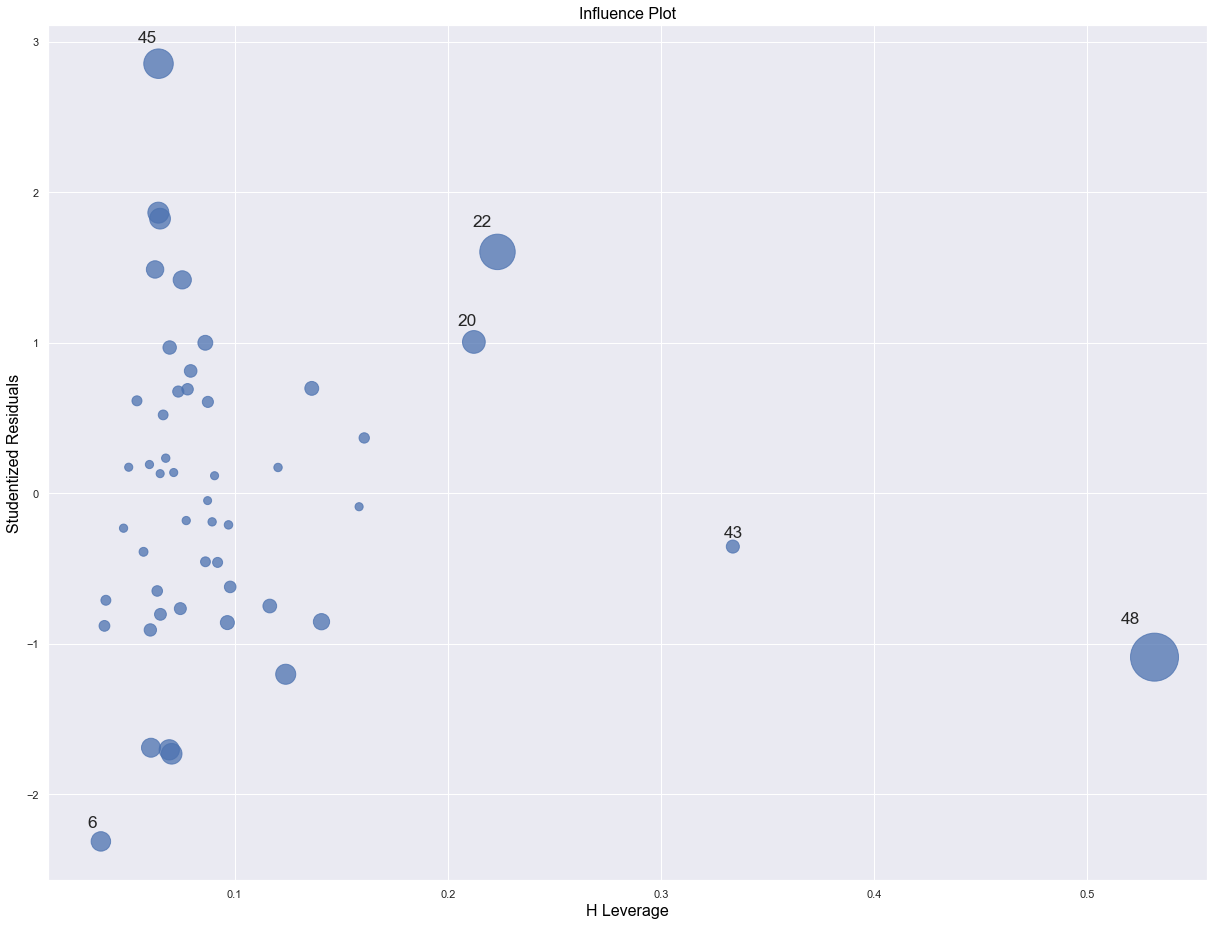

In [22]:
hapiness_model = sm.OLS(data_quint.iloc[:, [1]], sm.add_constant(data_quint.iloc[:, 2:])).fit()
fig, axe =  plt.subplots(1, 1, figsize=(17, 13))
fig = sm.graphics.influence_plot(hapiness_model, criterion="cooks", ax=axe)
fig.tight_layout(pad=1.0)

# Clustering Analysis

In [23]:
list_clustering_data = []
for K in range(1, 10):
    init_Clusters = MBClustering(data_quint, K).initZ()
    MBC_Clusters, BIC_val = MBClustering(data_quint, K).EM_algo(500)
    list_clustering_data.append([K, init_Clusters, MBC_Clusters, BIC_val])
list_clustering_data = np.array(list_clustering_data)

c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\idris\AppData\Local\Temp/ipykernel_8332/3004958668.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequenc

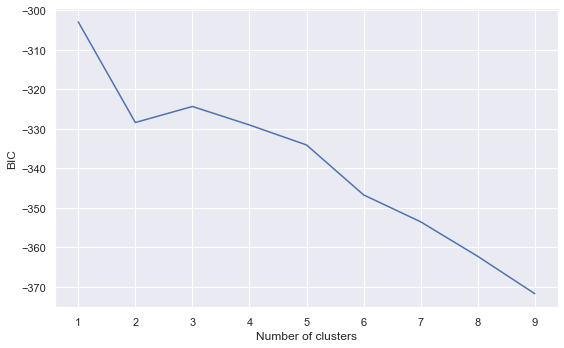

In [24]:
fig, axe =  plt.subplots(1, 1, figsize=(9, 5.5))
axe.plot(list_clustering_data[:, [0]], list_clustering_data[:, [3]])
axe.set_ylabel("BIC")
axe.set_xlabel("Number of clusters")
plt.savefig("./figs/bic_quiintana.pgf", format='pgf')
plt.show()

In [25]:
stop

NameError: name 'stop' is not defined

In [ ]:
K = 3

In [ ]:
data_quint.insert(2, "Kmeans_clusters", [1+list(list_clustering_data[K-1][1][n]).index(1) for n in range(list_clustering_data[K-1][1].shape[0])])

In [ ]:
data_quint.insert(1, "clusters", [1+list(list_clustering_data[K-1][2][n]).index(1) for n in range(list_clustering_data[K-1][2].shape[0])])

In [ ]:
data_quint.to_csv(f"./data/world_data_clusters_{K}.csv", sep=";", index=False)

In [ ]:
data_quint[data_quint.clusters==4].reset_index(drop=True)

In [ ]:
data_quint[data_quint.clusters==3].reset_index(drop=True)

In [ ]:
data_quint[data_quint.clusters==2].reset_index(drop=True)

In [ ]:
data_quint[data_quint.clusters==1].reset_index(drop=True)